# Credit Card Retention Analysis

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

In [2]:
data = pd.read_csv('../data/BankChurners_v2.csv')

In [3]:
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',]]

In [4]:
data['Education_Level'] = data['Education_Level'].fillna('Unknown')
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')
data['Income_Category'] = data['Income_Category'].fillna('Unknown')

In [5]:
# https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950
bins = [25, 30, 40, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']
data['Customer_Age_bins'] = pd.cut(data['Customer_Age'], bins=bins, labels=labels, include_lowest=True, right=False)

***

## Comparing Categories

<Axes: xlabel='Customer_Age_bins', ylabel='Credit_Limit'>

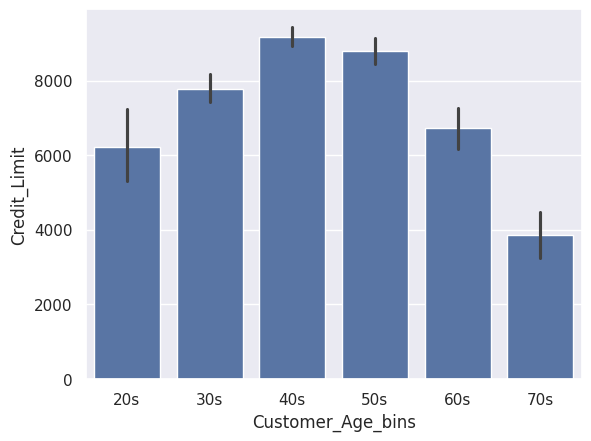

In [9]:
sns.barplot(x = 'Customer_Age_bins', y = 'Credit_Limit', data=data, estimator=np.mean)

Let's see what happens when we add in `Gender`, which we can do by specifying the `Hue`.

<Axes: xlabel='Customer_Age_bins', ylabel='Credit_Limit'>

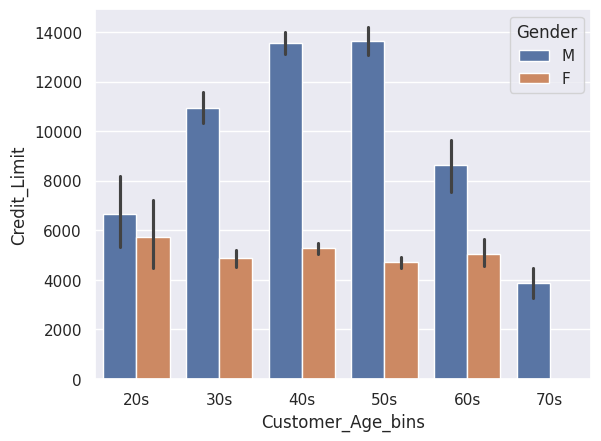

In [10]:
sns.barplot(x = 'Customer_Age_bins', y = 'Credit_Limit', data=data, estimator=np.mean, hue='Gender')

Let's swap that using the `estimator` parameter.

<Axes: xlabel='Customer_Age_bins', ylabel='Credit_Limit'>

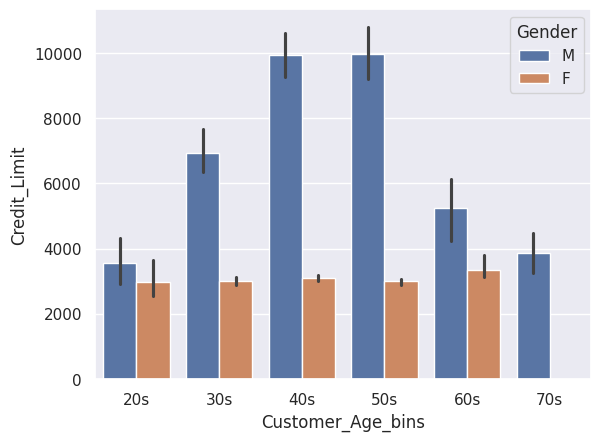

In [11]:
sns.barplot(x = 'Customer_Age_bins', y = 'Credit_Limit', data=data, estimator=np.median, hue='Gender')

In [14]:
barplot = data.groupby(['Customer_Age_bins','Gender'])['Credit_Limit'].mean().reset_index()

/tmp/ipykernel_26494/997566029.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: xlabel='Customer_Age_bins', ylabel='Credit_Limit'>

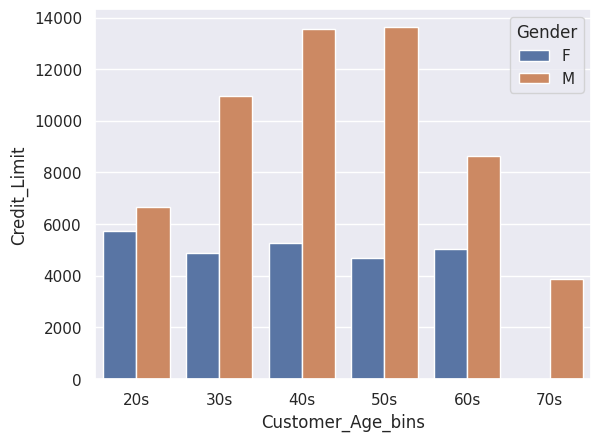

In [15]:
sns.barplot(x = 'Customer_Age_bins', y = 'Credit_Limit', data=barplot, estimator=np.median, hue='Gender')

We can turn the visual so that the bars go horizontally with just one parameter change. 

<Axes: xlabel='Credit_Limit', ylabel='Customer_Age_bins'>

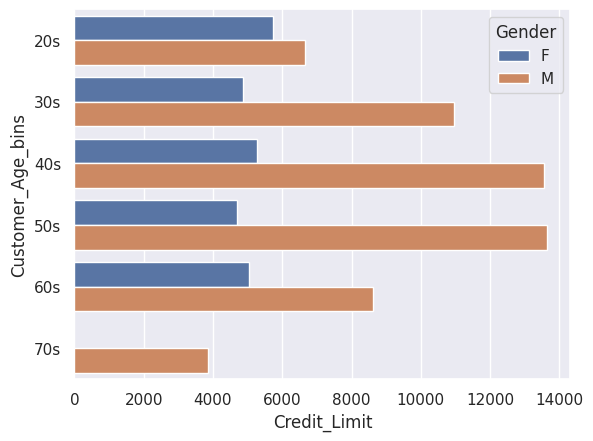

In [17]:
sns.barplot(y = 'Customer_Age_bins', x = 'Credit_Limit', data=barplot, estimator=np.median, hue='Gender', orient='h')

More inspiration for Lollipop charts can be found [here](https://www.tvhahn.com/posts/beautiful-plots-lollipop/)